In [ ]:
#not mandatory to have continous variables
#complute the probability for each customer for churn
#multiple class variables to seperate variable with get dummies


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Base_dataset.csv")
#X1 is the dependent variable 


In [3]:
df.head()

,Panel ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
0,1,2,2,1,2,2,2,2,2,2,...,4,4,3,4,4,4,4,4,4,3
1,2,1,1,2,1,2,1,2,2,2,...,3,4,4,3,4,4,4,3,4,4
2,3,2,2,1,1,2,2,1,2,2,...,5,5,5,4,5,4,5,4,3,5
3,4,1,1,1,1,2,1,1,1,1,...,5,4,3,5,4,3,3,3,2,4
4,5,1,1,1,1,1,1,1,1,1,...,4,5,4,4,3,3,4,1,1,3


In [7]:
df['X1']=df['X1'].replace([2,1],[1,0])

In [8]:
y=df['X1']

In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: X1, dtype: int64

In [13]:
x=df.drop([ 'Panel ID','X1'], axis=1)

In [14]:
x.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
0,2,1,2,2,2,2,2,2,2,2,...,4,4,3,4,4,4,4,4,4,3
1,1,2,1,2,1,2,2,2,1,2,...,3,4,4,3,4,4,4,3,4,4
2,2,1,1,2,2,1,2,2,1,1,...,5,5,5,4,5,4,5,4,3,5
3,1,1,1,2,1,1,1,1,1,1,...,5,4,3,5,4,3,3,3,2,4
4,1,1,1,1,1,1,1,1,1,2,...,4,5,4,4,3,3,4,1,1,3


In [42]:
x.shape

(24114, 59)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
logreg = LogisticRegression()
lreg=logreg.fit(X_train, y_train)

In [25]:
predi=lreg.predict(X_test)

In [80]:
logic=(accuracy_score(y_test,predi))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
logic

Accuracy of logistic regression classifier on test set: 0.9017


0.9017209205888451

In [87]:
lo=confusion_matrix(y_test,predi)
print('Confusion matrix of logistic regression classifier on test set:')
print(lo)

Confusion matrix of logistic regression classifier on test set:
[[3850  145]
 [ 329  499]]


In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
print('****** Confusion Matrix:Logistic regression********')
print(confusion_matrix(predi,y_test))

****** Confusion Matrix:Logistic regression********
[[3850  329]
 [ 145  499]]


In [37]:
TP = lo[1, 1]
TN = lo[0, 0]
FP = lo[0, 1]
FN = lo[1, 0]

In [38]:
precision=(TP/(TP+FP))

In [39]:
recall=(TP/(TP+FN))

In [40]:
f1score=2*(recall*precision)/(recall+precision)

In [41]:

print('****** Confusion Matrix:Precision Score ********')
print(precision)

print('****** Confusion Matrix:Recall value ********')
print(recall)

print('****** Confusion Matrix:F1 Score ********')
print(f1score)

****** Confusion Matrix:Precision Score ********
0.7748447204968945
****** Confusion Matrix:Recall value ********
0.6026570048309179
****** Confusion Matrix:F1 Score ********
0.6779891304347827


In [67]:
y_pred_prob=logreg.predict_proba(X_test)

In [73]:
y_pred_prob

array([[0.99176276, 0.00823724],
       [0.9651841 , 0.0348159 ],
       [0.91786339, 0.08213661],
       ...,
       [0.94796435, 0.05203565],
       [0.96664127, 0.03335873],
       [0.49418374, 0.50581626]])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predi))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94      3995
          1       0.77      0.60      0.68       828

avg / total       0.90      0.90      0.90      4823



(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

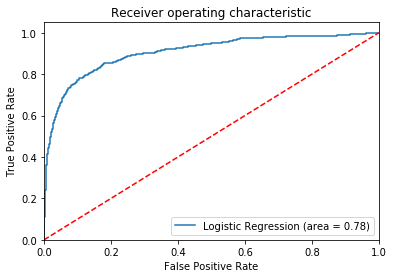

In [54]:
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.895


In [89]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285315
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     X1   No. Observations:                19291
Model:                          Logit   Df Residuals:                    19232
Method:                           MLE   Df Model:                           58
Date:                Fri, 13 Jul 2018   Pseudo R-squ.:                  0.3884
Time:                        11:52:34   Log-Likelihood:                -5504.0
converged:                       True   LL-Null:                       -8999.9
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X2             1.4286      0.066     21.602      0.000       1.299       1.558
X3             1.2845      0.

In [103]:
#to get the p values of insignificant variables
insig=[]
for col in X_train.columns:
    if  result.pvalues[col] > 0.05 :
            insig.append(col)
        #print(col)
        #print(lm.pvalues[col])


In [104]:
insig

['X7',
 'X20',
 'X24',
 'X25',
 'X26',
 'X28',
 'X30',
 'X31',
 'X34',
 'X36',
 'X37',
 'X39',
 'X40',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X50',
 'X51',
 'X52',
 'X55',
 'X56',
 'X57',
 'X59',
 'X60',
 'X61']